In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg
from tabulate import tabulate

## Problem 3

In [2]:
def poissonmat(n):
    #Returns an nxn sparse tridiagonal matrix with 2 on the diagonal and -1 on both off-diagonals.
    return(sparse.diags([-1, 2, -1], [-1, 0, 1], shape=(n, n)))

In [3]:
def poissonsolve(f):
    return(linalg.spsolve(poissonmat(len(f)), (np.power(1./(len(f)+1),2)*f)))

In [5]:
table = []
f = lambda t: np.sin(np.pi*t)
f_r = lambda t: 1/(np.power(np.pi,2))*np.sin(np.pi*t)
for i in [10,100,500,1000]:
    t = np.linspace(0,1,i)
    time = %time ans = poissonsolve(f(t))
    table.append([i, '1/{}'.format(len(t)+1), np.linalg.norm(ans - f_r(t)), np.linalg.norm(ans-f_r(t))/np.linalg.norm(f_r(t)), time])

Wall time: 0 ns
Wall time: 0 ns
Wall time: 1 ms
Wall time: 1e+03 µs


In [6]:
table[0][4] = '0 ns'
table[1][4] = '0 ns'
table[2][4] = '1 ms'
table[3][4] = '1e+3 micros'
print(tabulate(table, headers = ['n', 'h', 'Absolute Error', 'Relative Error', 'CPU Time']))

   n  h         Absolute Error    Relative Error  CPU Time
----  ------  ----------------  ----------------  -----------
  10  1/11          0.0401828         0.186954    0 ns
 100  1/101         0.0137353         0.0192679   0 ns
 500  1/501         0.00618504        0.00386462  1 ms
1000  1/1001        0.00437725        0.00193301  1e+3 micros


## Problem 4
b)

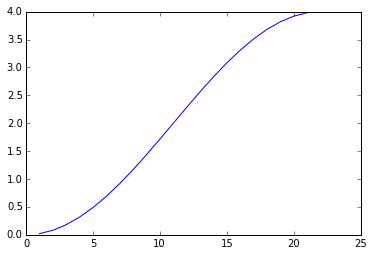

In [7]:
N = 21
f_v = lambda x: 2*(1-np.cos((np.pi*x)/(N+1))) 
x = np.arange(1, N+1, 1)
plt1 = plt.plot(x, f_v(x))

c)

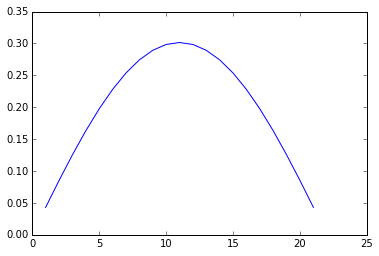

In [8]:
f_u = lambda j, k: np.sqrt(2./(N+1))*np.sin((j*k*np.pi)/(N+1))
plt2 = plt.plot(x, f_u(1,x))

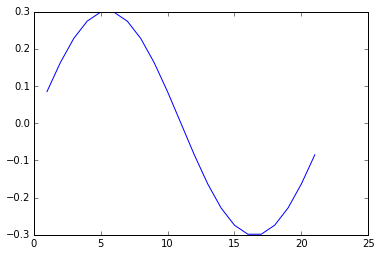

In [9]:
plt3 = plt.plot(x, f_u(2,x))

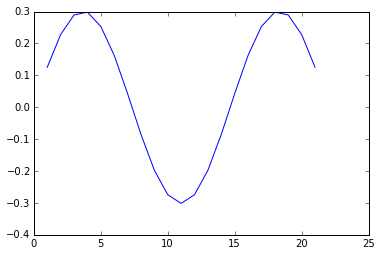

In [10]:
plt4 = plt.plot(x, f_u(3,x))

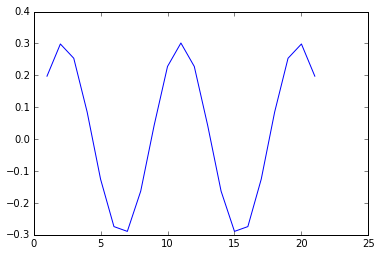

In [11]:
plt5 = plt.plot(x, f_u(5,x))

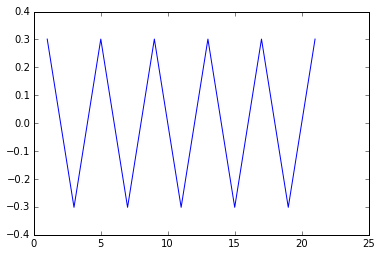

In [12]:
plt6 = plt.plot(x, f_u(11,x))

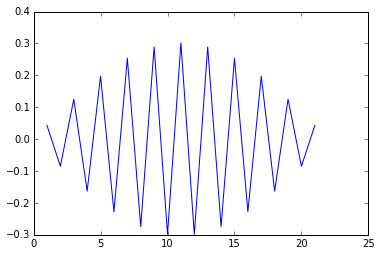

In [13]:
plt7 = plt.plot(x, f_u(21,x))

d)

In [14]:
def power_method(A, guess, maxiter = 10000, tau = 10e-6):
    v = guess
    prev_norm = 0
    for i in range(maxiter):
        v = A*v
        curr_norm = np.linalg.norm(v)
        v = v/np.linalg.norm(v)
        if np.abs(prev_norm - curr_norm) < tau:
            print 'Found in {} iterations.'.format(i+1)
            return v
        prev_norm = curr_norm
    print 'Did not converge for specified number of iterations.({})'.format(np.abs(prev_norm - curr_norm))
    
def check(A, output, low = False):
    prod = A*output
    eigval = prod[0]/output[0]
    print 'Computed eigenvalue: {}'.format(eigval[0])
    eig, _ = linalg.eigsh(A, k = A.shape[0]-1)
    if low:
        print 'Smallest eigenvalue: {}'.format(np.sort(np.absolute(eig))[0])
    else:
        print 'Largest eigenvalue: {}'.format(np.sort(np.absolute(eig))[-1])

In [15]:
N = 500
A = poissonmat(N)
guess = np.random.random((N,1))
v = power_method(A, guess)
check(A, v)

Found in 307 iterations.
Computed eigenvalue: 3.99768634436
Largest eigenvalue: 3.99996067915


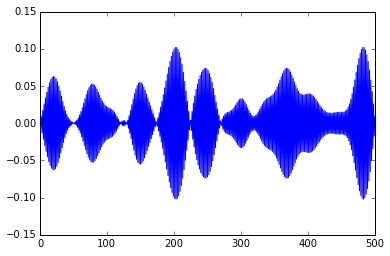

In [16]:
plt8 = plt.plot(np.arange(1,501,1), v)

e)

In [17]:
def inverse_power(A, guess, maxiter = 10000, tau = 10e-6):
    v = guess
    prev_norm = 0
    Ainv = linalg.splu(A)
    for i in range(maxiter):
        v = Ainv.solve(v)
        curr_norm = np.linalg.norm(v)
        v = v/np.linalg.norm(v)
        if np.abs(prev_norm - curr_norm) < tau:
            print 'Found in {} iterations.'.format(i+1)
            return v
        prev_norm = curr_norm
    print 'Did not converge for specified number of iterations.({})'.format(np.abs(prev_norm - curr_norm))

In [19]:
guess = np.random.random((N,1))
v = inverse_power(A, guess)
check(A, v, low = True)

Found in 7 iterations.
Computed eigenvalue: 3.9320978686e-05
Smallest eigenvalue: 0.00015728184415


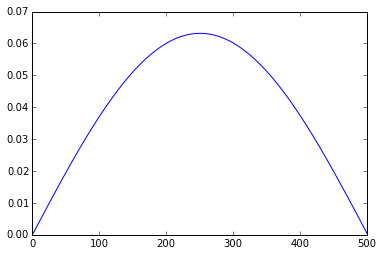

In [20]:
plt9 = plt.plot(np.arange(1,501,1), v)